In [1]:
from dataset import *
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

In [5]:
torch.set_printoptions(threshold=float('inf'))
np.set_printoptions(threshold=float('inf'))

# Tách thành 2 folder img và label

In [11]:
os.listdir('data/img')[0]

'20140603_0003_BCCTC_tg_0_0.png'

In [14]:
import shutil

for path in os.listdir('data/img'):
    if path.endswith(('txt')):
        source = 'data/img/' + path
        # Đường dẫn mới của file sau khi di chuyển
        destination = 'data/label/' + path

        # Di chuyển file
        try:
            shutil.move(source, destination)
            print("File đã được di chuyển thành công.")
        except Exception as e:
            print(f"Không thể di chuyển file: {e}")


File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuyển thành công.
File đã được di chuy

In [15]:
len(os.listdir('data/img')) == len(os.listdir('data/label'))


True

In [22]:
def flist_reader(imgs, labels):
    imlist = []
    img_exts = ('jpg', 'png', 'JPG', 'PNG')
    for impath in os.listdir(imgs):
        imlabel = os.path.splitext(impath)[0] + '.txt'
        
        impath = imgs + '/' + impath
        imlabel = labels + '/' +  imlabel
        imlist.append((impath, imlabel))
                                    
    return imlist

In [23]:
flist_reader('data/img', 'data/label')

[('data/img/20140603_0003_BCCTC_tg_0_0.png',
  'data/label/20140603_0003_BCCTC_tg_0_0.txt'),
 ('data/img/20140603_0003_BCCTC_tg_0_1.png',
  'data/label/20140603_0003_BCCTC_tg_0_1.txt'),
 ('data/img/20140603_0003_BCCTC_tg_0_2.png',
  'data/label/20140603_0003_BCCTC_tg_0_2.txt'),
 ('data/img/20140603_0003_BCCTC_tg_0_3.png',
  'data/label/20140603_0003_BCCTC_tg_0_3.txt'),
 ('data/img/20140603_0003_BCCTC_tg_0_4.png',
  'data/label/20140603_0003_BCCTC_tg_0_4.txt'),
 ('data/img/20140603_0003_BCCTC_tg_0_5.png',
  'data/label/20140603_0003_BCCTC_tg_0_5.txt'),
 ('data/img/20140603_0003_BCCTC_tg_0_6.png',
  'data/label/20140603_0003_BCCTC_tg_0_6.txt'),
 ('data/img/20140603_0003_BCCTC_tg_1_0.png',
  'data/label/20140603_0003_BCCTC_tg_1_0.txt'),
 ('data/img/20140603_0003_BCCTC_tg_1_1.png',
  'data/label/20140603_0003_BCCTC_tg_1_1.txt'),
 ('data/img/20140603_0003_BCCTC_tg_1_2.png',
  'data/label/20140603_0003_BCCTC_tg_1_2.txt'),
 ('data/img/20140603_0003_BCCTC_tg_1_3.png',
  'data/label/20140603_00

# Test Dataset

In [2]:
dataset = DatasetImg(imgFolder = 'data/img',
                     labelFolder = 'data/label',
                     imgW=512,
                     imgH=48)

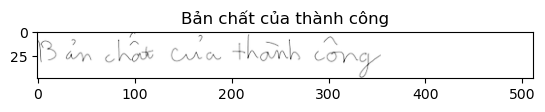

In [3]:
img, label = dataset[0]
plt.imshow(img, cmap='Grays')
plt.title(label)
plt.show()

In [ ]:
img

In [5]:

from torch.utils.data import random_split
train, test = random_split(range(10), [3, 7])

In [6]:
train[0]

5

In [7]:
from PIL import Image
import numpy as np

# Đọc hình ảnh
image = Image.open('data/img/20140603_0003_BCCTC_tg_0_0.png')

# Chuyển hình ảnh thành ảnh xám (grayscale) để dễ xử lý
gray_image = image.convert('L')

# Chuyển hình ảnh thành ma trận numpy
image_array = np.array(gray_image)


In [11]:
# Tìm các dòng và cột mà không phải toàn bộ là trắng
# Giả sử rằng giá trị pixel trắng là 255 cho ảnh grayscale
# Thay đổi ngưỡng này tùy thuộc vào mức độ tách biệt của chữ so với nền
non_empty_columns = np.where(image_array.min(axis=0) < 255)[0]
non_empty_rows = np.where(image_array.min(axis=1) < 255)[0]

# Cắt hình ảnh để loại bỏ các mép trắng
cropped_image = image_array[min(non_empty_rows):max(non_empty_rows) + 1,
                            min(non_empty_columns):max(non_empty_columns) + 1]


In [14]:
cropped_image_pil = Image.fromarray(cropped_image)
cropped_image_pil.show()

In [16]:
# Resize ảnh sử dụng phương pháp ANTIALIAS để giảm thiểu hiện tượng răng cưa
resized_image = cropped_image_pil.resize((128, 128), Image.Resampling.LANCZOS)


In [ ]:
np.array(cropped_image_pil)

In [7]:
image = torch.FloatTensor(64, 3, 32, 512)


In [10]:
image.shape

torch.Size([64, 3, 32, 512])